In [1]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import time

# Initialize API key and TimeSeries instance
api_key = 'MHJLZTCD3X375V8C'
ts = TimeSeries(key=api_key, output_format='pandas')


In [2]:
# Function to get live stock data
def get_live_stock_data(symbol, interval='1min', duration=60):
    """Fetch live stock data for a specific symbol and interval.
    Parameters:
    - symbol (str): The stock ticker symbol.
    - interval (str): Time interval for fetching data (e.g., '1min').
    - duration (int): Total time in seconds to collect data.

    Returns:
    - DataFrame of live stock prices.
    """
    end_time = time.time() + duration
    collected_data = pd.DataFrame()

    while time.time() < end_time:
        try:
            # Fetch intraday time series data
            data, meta_data = ts.get_intraday(symbol=symbol, interval=interval, outputsize='compact')
            current_time = pd.Timestamp.now()
            latest_data = data.head(1)  # Get the latest price point
            latest_data.index = [current_time]  # Use the current time as the index
            collected_data = pd.concat([collected_data, latest_data])
            
            # Append to CSV file
            latest_data.to_csv(f'{symbol}_live_data.csv', mode='a', header=not collected_data.empty)
            print(f"Data collected at {current_time}")
        except Exception as e:
            print("Error fetching data:", e)
        
        time.sleep(60)  # Adjust this to control the frequency of data collection

    return collected_data


In [ ]:
# Define the stock symbol and duration in seconds (e.g., collect for 1 hour = 3600 seconds)
symbol = 'AAPL'
duration = 3600  # Collect data for one hour

# Run the data collection
collected_data = get_live_stock_data(symbol, interval='1min', duration=duration)

# Display the collected data
print(collected_data.head())


Data collected at 2024-11-12 17:53:00.324054
Data collected at 2024-11-12 17:54:02.339636
Data collected at 2024-11-12 17:55:03.234971
Data collected at 2024-11-12 17:56:04.436978
Data collected at 2024-11-12 17:57:05.533318
Data collected at 2024-11-12 17:58:06.730379
Data collected at 2024-11-12 17:59:07.837542
Data collected at 2024-11-12 18:00:09.237071
Data collected at 2024-11-12 18:01:10.600468
Data collected at 2024-11-12 18:02:11.531990
Data collected at 2024-11-12 18:03:12.940759
Data collected at 2024-11-12 18:04:14.137498
Data collected at 2024-11-12 18:05:15.437644
Data collected at 2024-11-12 18:06:16.498757
Data collected at 2024-11-12 18:07:17.738744
Data collected at 2024-11-12 18:08:19.141990
Data collected at 2024-11-12 18:09:20.352227
Data collected at 2024-11-12 18:10:21.543142
Data collected at 2024-11-12 18:11:22.844531
Data collected at 2024-11-12 18:12:24.147559
Data collected at 2024-11-12 18:13:25.429947
Data collected at 2024-11-12 18:14:26.651991
Data colle

In [1]:
import requests

# Define your API token and endpoint
api_key = 'your_api_key_here'
symbol = 'AAPL'
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={'AAPL'}&apikey={'MHJLZTCD3X375V8C'}'

# Send the request to the API
response = requests.get(url)

# Parse the JSON data
data = response.json()

# Display the fetched data
print(data)


{'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}


In [9]:
import yfinance as yf
import pandas as pd

# Download Apple stock data from 2020 to 2024
data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

# Make sure datetime index is timezone-naive
data.index = data.index.tz_localize(None)

# Save the data to an Excel file
data.to_excel('AAPL_stock_data.xlsx')

# Optional: Print first few rows to verify
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2020-01-02  72.796013  75.087502  75.150002  73.797501  74.059998  135480400
2020-01-03  72.088303  74.357498  75.144997  74.125000  74.287498  146322800
2020-01-06  72.662727  74.949997  74.989998  73.187500  73.447502  118387200
2020-01-07  72.320969  74.597504  75.224998  74.370003  74.959999  108872000
2020-01-08  73.484337  75.797501  76.110001  74.290001  74.290001  132079200


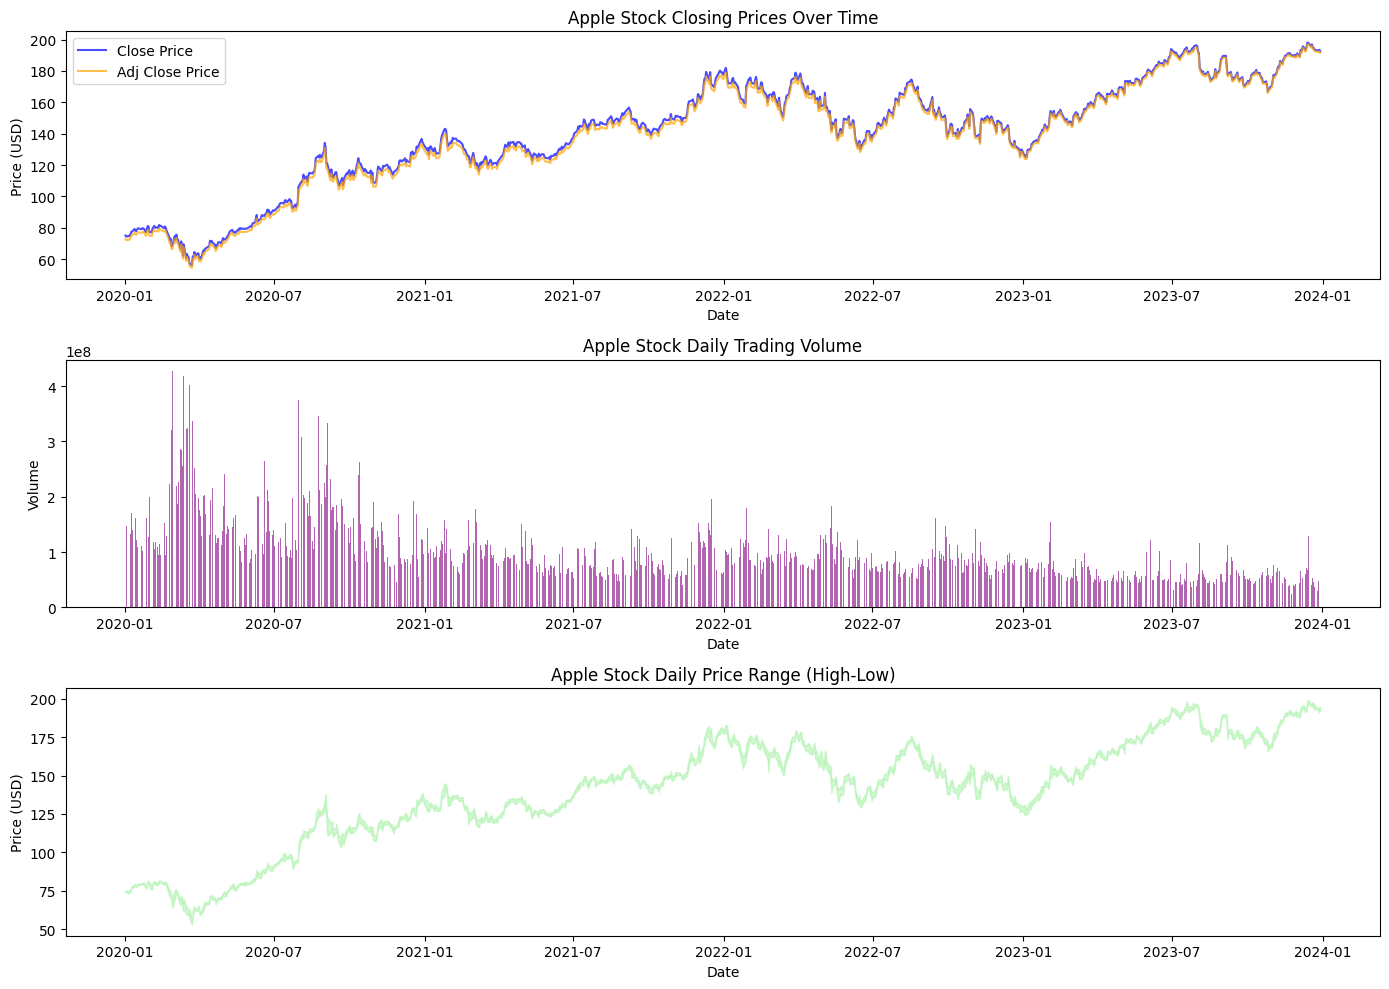

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'AAPL_stock_data.xlsx'  # Ensure the file path is correct
data = pd.read_excel(file_path)

# Clean and preprocess the data
data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
data = data.drop([0, 1])  # Adjust based on file structure
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']] = data[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']].apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)

# Set up the plotting area
plt.figure(figsize=(14, 10))

# 1. Line Plot for Close and Adjusted Close Prices
plt.subplot(3, 1, 1)
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue', alpha=0.7)
plt.plot(data['Date'], data['Adj Close'], label='Adj Close Price', color='orange', alpha=0.7)
plt.title('Apple Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

# 2. Bar Plot for Daily Trading Volume
plt.subplot(3, 1, 2)
plt.bar(data['Date'], data['Volume'], color='purple', alpha=0.6)
plt.title('Apple Stock Daily Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')

# 3. Area Plot for High-Low Price Range
plt.subplot(3, 1, 3)
plt.fill_between(data['Date'], data['Low'], data['High'], color='lightgreen', alpha=0.4)
plt.title('Apple Stock Daily Price Range (High-Low)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Improve layout and show plots
plt.tight_layout()
plt.show()

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Load and preprocess the data
file_path = 'AAPL_stock_data.xlsx'  # Make sure to have the correct file path
data = pd.read_excel(file_path)

# Only use the 'Close' price for prediction
data = data[['Close']].dropna()  # Ensure no missing values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data for the LSTM model
sequence_length = 60  # Using 60 days of data to predict the next day
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape X for LSTM [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, batch_size=1, epochs=1)  # Increase epochs for better accuracy

# Predict the future price
# We will use the last 60 days of data to predict the next day
last_60_days = scaled_data[-sequence_length:]
last_60_days = np.reshape(last_60_days, (1, sequence_length, 1))
predicted_price = model.predict(last_60_days)
predicted_price = scaler.inverse_transform(predicted_price)  # Inverse transform to get the actual value

# Display the predicted price
print("Predicted Price for Next Day:", predicted_price[0][0])

# Visualize the results
train_data = data[:len(data) - sequence_length]
valid_data = data[len(data) - sequence_length:]
valid_data['Predictions'] = scaler.inverse_transform(model.predict(X))

plt.figure(figsize=(16, 8))
plt.plot(train_data['Close'], label='Training Data')
plt.plot(valid_data[['Close', 'Predictions']], label=['Actual Price', 'Predicted Price'])
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend(['Training Data', 'Actual Price', 'Predicted Price'])
plt.show()


ModuleNotFoundError: No module named 'sklearn'